In [11]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


# Load a specific environment variable
GROQ_API_KEY = os.environ.get('GROQ_API_KEY')

In [12]:

_set_env("LANGSMITH_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [5]:
import os
from langchain_groq import ChatGroq
# Load a specific environment variable
GKGraph_API_KEY = os.environ.get('GKGraph_API_KEY')

llm = ChatGroq(model="llama3-groq-70b-8192-tool-use-preview")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [6]:
graph_builder.add_edge(START, "chatbot")

In [7]:
graph_builder.add_edge("chatbot", END)

In [8]:
graph = graph_builder.compile()

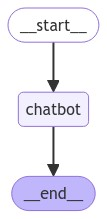

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User: what's langgraph all about?
Assistant: LangGraph!

LangGraph is a fascinating project that aims to create a comprehensive, graph-based representation of the world's languages. It's a massive collaborative effort to map the relationships between languages, their features, and their speakers.

Here's a brief overview:

**What is LangGraph?**
LangGraph is an open-source, graph-based language database that seeks to catalog the world's languages, their variants, and their relationships. It's designed to be a dynamic, web-based platform that allows linguists, researchers, and language enthusiasts to contribute, collaborate, and explore the complex network of languages.

**Key features:**

1. **Graph-based representation**: LangGraph uses a graph database to model the relationships between languages, dialects, and linguistic features. This allows for powerful querying and exploration of the language landscape.
2. **Language mapping**: The platform maps languages to their respective lang

In [3]:
from typing import Annotated
import os
from langchain_groq import ChatGroq
# Load a specific environment variable
GKGraph_API_KEY = os.environ.get('GKGraph_API_KEY')

llm = ChatGroq(model="llama3-groq-70b-8192-tool-use-preview")
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# llm = ChatAnthropic(model="claude-3-haiku-20240307")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

In [6]:
graph.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', id='1ab6ce68-0558-4775-b271-17340d3c9a30'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.019567992, 'prompt_time': 0.002335985, 'queue_time': None, 'total_time': 0.021903976999999998}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'stop', 'logprobs': None}, id='run-24419d9b-00ae-4c70-81e1-53a9cd60afb9-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [8]:
graph.get_state_history

<bound method Pregel.get_state_history of CompiledStateGraph(nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden'], 'metadata': {}, 'configurable': {}}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<messages>(recurse=True, writes=[ChannelWriteEntry(channel='messages', value=<object object at 0x0000024B59FF3580>, skip_none=False, mapper=_get_state_key(recurse=False))], require_at_least_one_of=['messages']), ChannelWrite<start:chatbot>(recurse=True, writes=[ChannelWriteEntry(channel='start:chatbot', value='__start__', skip_none=False, mapper=None)], require_at_least_one_of=None)]), 'chatbot': PregelNode(config={'tags': [], 'metadata': {}, 'configurable': {}}, channels={'messages': 'messages'}, triggers=['start:chatbot'], mapper=functools.partial(<function _coerce_state at 0x0000024B5BBD2E80>, <class '__main__.State'>), writers=[ChannelWrite<chatbot,messages>(recurse=True, writes=[ChannelWriteEntry(channel='chatbot', value='chatbot', skip_none=False, 

In [ ]:
%%capture --no-stderr
%pip install -U tavily-python
%pip install -U langchain_community

In [2]:
_set_env("TAVILY_API_KEY")

NameError: name '_set_env' is not defined

In [5]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
# tool.invoke("What's a 'node' in LangGraph?")

In [13]:
from typing import Annotated

from langchain_groq import ChatGroq
# Load a specific environment variable
GKGraph_API_KEY = os.environ.get('GKGraph_API_KEY')


from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm = ChatGroq(model="llama3-groq-70b-8192-tool-use-preview")
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)


###  Next we need to create a function to actually run the tools if they are called. We'll do this by adding the tools to a new node.

Below, implement a BasicToolNode that checks the most recent message in the state and calls tools if the message contains tool_calls. It relies on the LLM's tool_calling support, which is available in Anthropic, OpenAI, Google Gemini, and a number of other LLM providers.

We will later replace this with LangGraph's prebuilt ToolNode to speed things up, but building it ourselves first is instructive.

toolnode url:https://langchain-ai.github.io/langgraph/reference/prebuilt/#toolnode

In [14]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

The condition will route to tools if tool calls are present and "__end__" if not.

Later, we will replace this with the prebuilt tools_condition to be more concise, but implementing it ourselves first makes things more clear.
tools_condition url:  https://langchain-ai.github.io/langgraph/reference/prebuilt/#tools_condition

In [15]:
from typing import Literal


def route_tools(
    state: State,
) -> Literal["tools", "__end__"]:
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "__end__"


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "__end__" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", "__end__": "__end__"},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

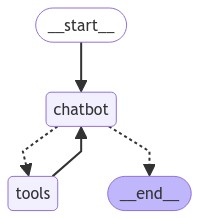

In [16]:

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
from langchain_core.messages import BaseMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                print("Assistant:", value["messages"][-1].content)

In [3]:
from typing import Annotated

from langchain_groq import ChatGroq
# Load a specific environment variable
GKGraph_API_KEY = os.environ.get('GKGraph_API_KEY')

# from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatGroq(model="llama3-8b-8192", temperature = 0.0) 
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()


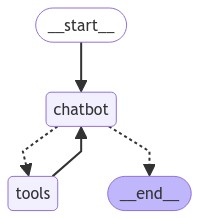

In [4]:

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [5]:
from langchain_core.messages import BaseMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                print("Assistant:", value["messages"][-1].content)

User: who is the current president of Egypt
Assistant: 
Assistant: [{"url": "https://www.bbc.com/news/world-middle-east-19256730", "content": "Abdul Fattah al-Sisi has been Egypt's president since 2014, a year after he led the military's overthrow of Islamist President Mohammed Morsi amid mass protests against his rule. The retired field ..."}, {"url": "https://www.presidency.eg/en/\u0627\u0644\u0631\u0626\u0627\u0633\u0629/\u0627\u0644\u0631\u0626\u064a\u0633/", "content": "President Abdel Fattah El-Sisi. This site uses cookies. By continuing to browse the site, you are agreeing to our use of cookies. Egypt About Egypt ... President of the Arab Republic of Egypt; Chairman of the African Union 2019-2020; Medals and Decorations Medals and Decorations 25th April 1982 Decoration;"}]
Assistant: 
Assistant: [{"url": "https://www.presidency.eg/en/\u0627\u0644\u0631\u0626\u0627\u0633\u0629/\u0627\u0644\u0631\u0626\u064a\u0633/", "content": "Name: Abdel Fattah Saeed Hussein Khalil El-Sisi. Bir

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool-use>\n{\n  "tool_calls": [\n    {\n      "id": "pending",\n      "type": "function",\n      "function": {\n        "name": "get_current_weather"\n      },\n      "parameters": {\n        "location": "Oshawa"\n      }\n    }\n  ]\n}\n</tool-use>'}}